In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def load_image(path, threshold=127):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    binary_image = binary_image // 255  # Convert to binary image (0, 1)
    return binary_image

def plot_image(image, title='Image'):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def neighbors(x, y, image):
    "Return 8-neighbors of image point P1(x,y), in a clockwise order"
    img = image
    return [img[x-1][y], img[x-1][y+1], img[x][y+1], img[x+1][y+1], img[x+1][y], img[x+1][y-1], img[x][y-1], img[x-1][y-1]]

def transitions(neighbors):
    "Count the number of 0-1 transitions in the ordered sequence"
    n = neighbors + neighbors[0:1]  # Circular
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))

def zhang_suen_thinning(image):
    "the Zhang-Suen Thinning Algorithm"
    Image_Thinned = image.copy()  # Making copy of image for thinning
    changing1 = changing2 = 1  # Initialize changing points
    while changing1 or changing2:  # Loop until no further changes occur in the image
        # Step 1
        changing1 = []
        for i in range(1, image.shape[0] - 1):
            for j in range(1, image.shape[1] - 1):
                P2, P3, P4, P5, P6, P7, P8, P9 = neighbors(i, j, Image_Thinned)
                if (Image_Thinned[i][j] == 1 and
                        2 <= sum([P2, P3, P4, P5, P6, P7, P8, P9]) <= 6 and
                        transitions([P2, P3, P4, P5, P6, P7, P8, P9]) == 1 and
                        P2 * P4 * P6 == 0 and
                        P4 * P6 * P8 == 0):
                    changing1.append((i, j))
        for i, j in changing1: Image_Thinned[i][j] = 0
        # Step 2
        changing2 = []
        for i in range(1, image.shape[0] - 1):
            for j in range(1, image.shape[1] - 1):
                P2, P3, P4, P5, P6, P7, P8, P9 = neighbors(i, j, Image_Thinned)
                if (Image_Thinned[i][j] == 1 and
                        2 <= sum([P2, P3, P4, P5, P6, P7, P8, P9]) <= 6 and
                        transitions([P2, P3, P4, P5, P6, P7, P8, P9]) == 1 and
                        P2 * P4 * P8 == 0 and
                        P2 * P6 * P8 == 0):
                    changing2.append((i, j))
        for i, j in changing2: Image_Thinned[i][j] = 0
    return Image_Thinned


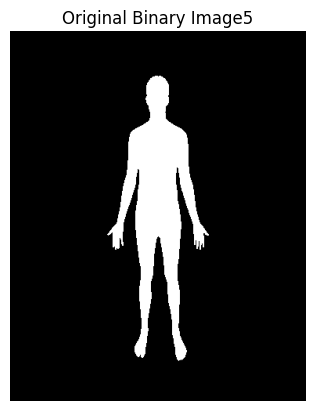

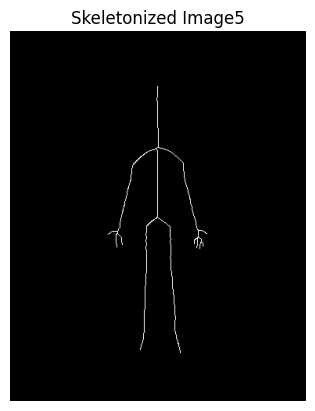

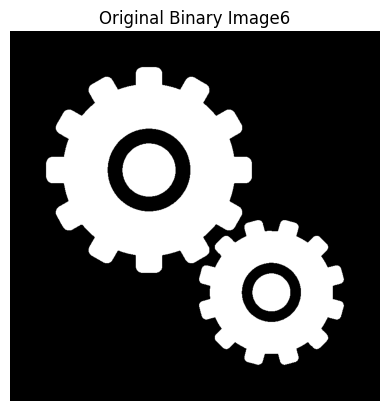

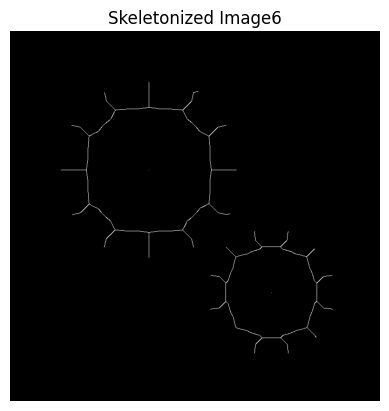

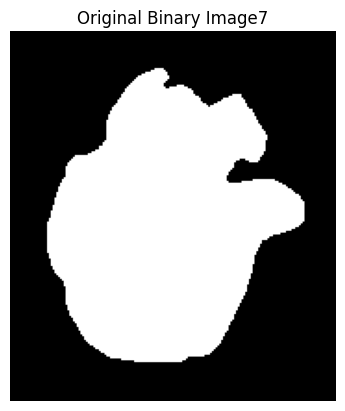

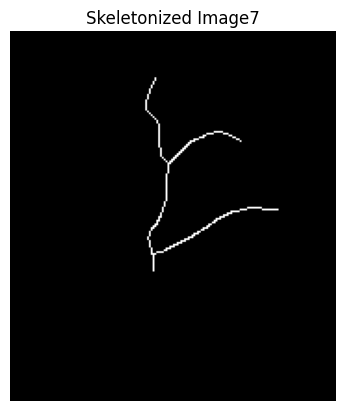

In [5]:
# Load and process the image
binary_image1 = load_image("/content/q8_5.jpg")
skeleton1 = zhang_suen_thinning(binary_image1)

binary_image2 = load_image("/content/q8_6.png")
skeleton2 = zhang_suen_thinning(binary_image2)

binary_image3 = load_image("/content/q8_7.png")
skeleton3 = zhang_suen_thinning(binary_image3)

# Plot the result
plot_image(binary_image1, 'Original Binary Image5')
plot_image(skeleton1, 'Skeletonized Image5')

plot_image(binary_image2, 'Original Binary Image6')
plot_image(skeleton2, 'Skeletonized Image6')

plot_image(binary_image3, 'Original Binary Image7')
plot_image(skeleton3, 'Skeletonized Image7')

In [6]:
def dilate(image, iterations):
    kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
    dilated_image = image.copy()
    for _ in range(iterations):
        dilated_image = cv2.dilate(dilated_image, kernel, iterations=1)
    return dilated_image

def reconstruct_from_skeleton(skeleton, iterations=1):
    reconstructed_image = dilate(skeleton, iterations)
    return reconstructed_image


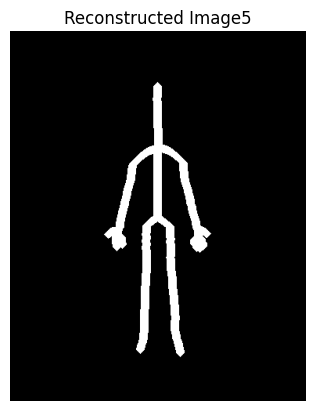

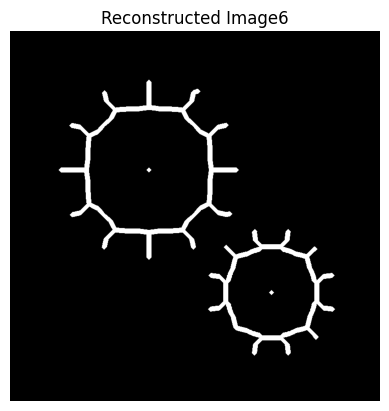

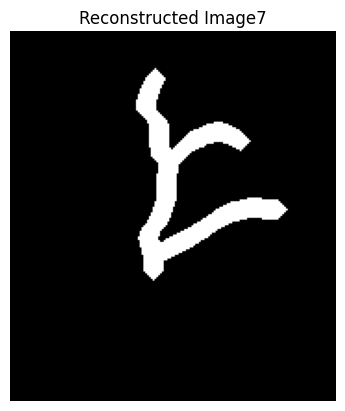

In [7]:
# Reconstruct the image
reconstructed_image1 = reconstruct_from_skeleton(skeleton1, iterations=5)
reconstructed_image2 = reconstruct_from_skeleton(skeleton2, iterations=5)
reconstructed_image3 = reconstruct_from_skeleton(skeleton3, iterations=5)

# Plot the reconstructed image
plot_image(reconstructed_image1, 'Reconstructed Image5')
plot_image(reconstructed_image2, 'Reconstructed Image6')
plot_image(reconstructed_image3, 'Reconstructed Image7')